# Libararies


#### Basic Libraries

In [1]:
import numpy as np
import pandas as pd

#### Visualization Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading
Load dataset from csv file located in current folder:


In [ ]:
df = pd.read_csv('Data.csv')
df.head()

# Data Preparation


In this section we must split data into three datasets:
<br>
    1. clinical dataset
<br>
    2. gene expressions dataset
<br>
    3. gene mutation dataset.
<br>

All datasets should have the patient_id and overall_survival column.
<br>
We may get warning about data type of some columns.fix the warning.

#### Clinical Data

In [4]:
clinical_data = df.iloc[:,:31]
clinical_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


#### Seperating Gene Expression and Gene Mutation Columns

In [5]:
exp_columns = []
mut_columns = []
for i in df.columns[31:]:
    if i[-4:] == '_mut':
        mut_columns.append(i)
    else:
        exp_columns.append(i)

#### Gene Expression Data

In [6]:
gen_exp_data = df[exp_columns]
gen_exp_data.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


#### Gene Mutation Data

In [7]:
gen_mut_data = df[mut_columns]
gen_mut_data.head()

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory data analysis (EDA)

## Clinical data EDA


### missing values
The percentage of missing values in clinical data:

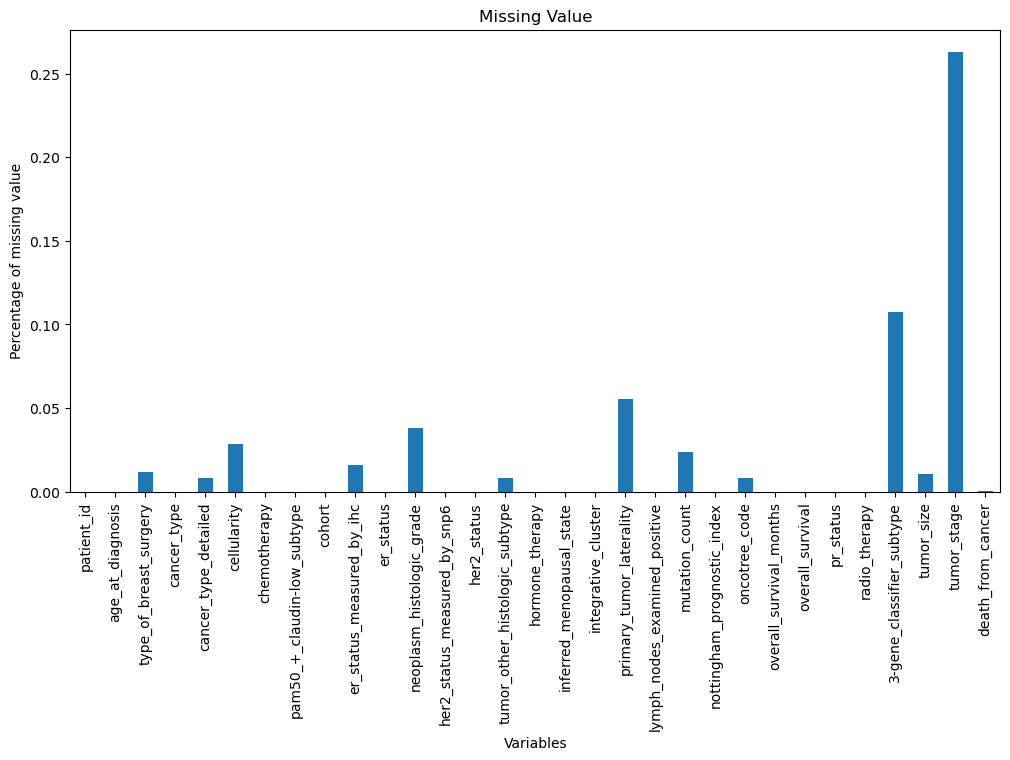

In [8]:
missing_percentage = clinical_data.isnull().sum() / len(clinical_data)
plot = missing_percentage.plot.bar(xlabel = 'Variables',
                            ylabel = 'Percentage of missing value',
                            title = 'Missing Value',
                            figsize = (12,6))
plt.show()

### Box plot of numerical columns
Seperated numerical columns of the clincical data and plot their box plot.


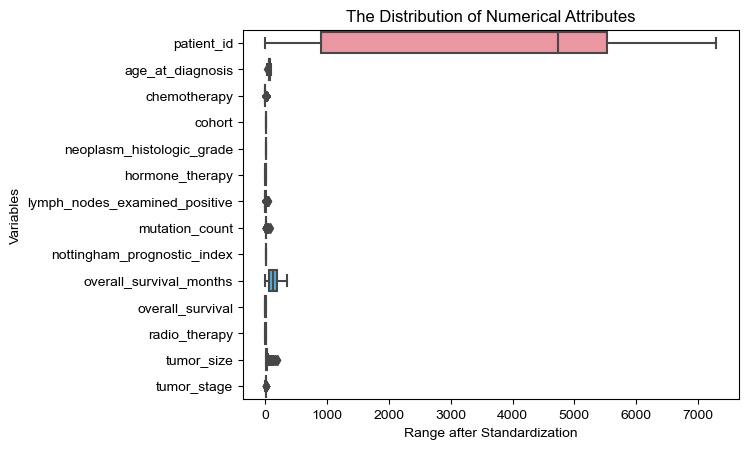

In [9]:
def numerical_df(df):
    num_df = df.select_dtypes('number')
    return num_df

numerical_clinical_data = numerical_df(clinical_data)

boxplot = sns.boxplot(data=numerical_clinical_data, orient='h')
boxplot.set(xlabel ="Range after Standardization", ylabel = "Variables", title ='The Distribution of Numerical Attributes')
sns.set(font_scale = 1)
boxplot.grid(False)
sns.set_style("whitegrid")

plt.show()

### Target classes plots
Plotted the histogram of age_at_diagnosis , overall_survival_months  and tumor_size based for people who died and survived (based on overall_survival column).


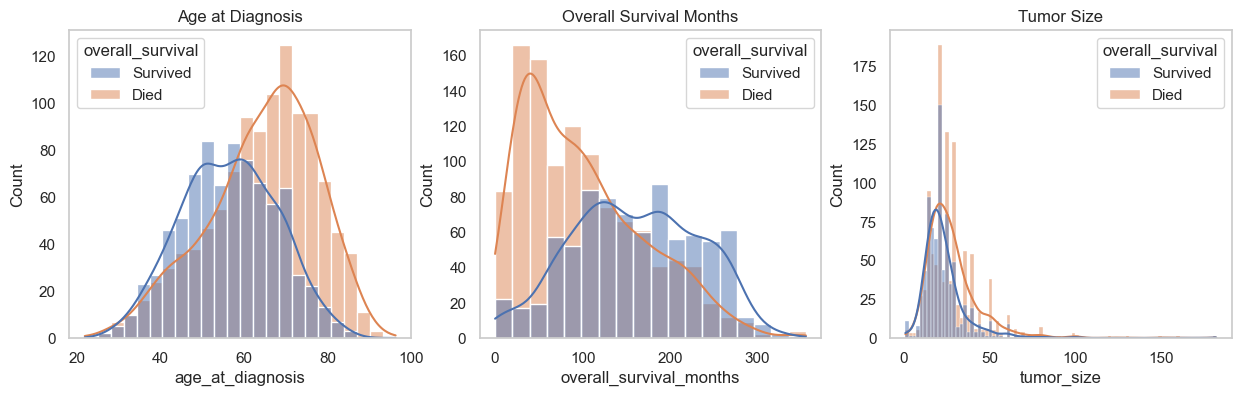

In [10]:
row, fig_num = plt.subplots(1, 3, figsize=(15, 4))

df1 = df.copy()
df1['overall_survival'] = np.where(df['overall_survival'] == 1, 'Survived', df1['overall_survival'])
df1['overall_survival'] = np.where(df['overall_survival'] == 0, 'Died', df1['overall_survival'])

age_at_diagnosis = sns.histplot(ax=fig_num[0], data=df1, x="age_at_diagnosis", hue="overall_survival", kde=True)
fig_num[0].set_title('Age at Diagnosis')
age_at_diagnosis.grid(False)

overall_survival_months = sns.histplot(ax=fig_num[1], data=df1, x="overall_survival_months", hue="overall_survival", kde=True)
fig_num[1].set_title('Overall Survival Months')
overall_survival_months.grid(False)

tumor_size = sns.histplot(ax=fig_num[2], data=df1, x="tumor_size", hue="overall_survival", kde=True)
fig_num[2].set_title('Tumor Size')
tumor_size.grid(False)

plt.show()

### Making dummy dataframe

In [11]:
def categorical_df(df):
    cat_df = df.select_dtypes('object')
    return cat_df

categorical_data = categorical_df(clinical_data)
clinical_dum_data = pd.get_dummies(categorical_data)
print(list(clinical_dum_data.columns))

['type_of_breast_surgery_BREAST CONSERVING', 'type_of_breast_surgery_MASTECTOMY', 'cancer_type_Breast Cancer', 'cancer_type_Breast Sarcoma', 'cancer_type_detailed_Breast', 'cancer_type_detailed_Breast Invasive Ductal Carcinoma', 'cancer_type_detailed_Breast Invasive Lobular Carcinoma', 'cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma', 'cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma', 'cancer_type_detailed_Metaplastic Breast Cancer', 'cellularity_High', 'cellularity_Low', 'cellularity_Moderate', 'pam50_+_claudin-low_subtype_Basal', 'pam50_+_claudin-low_subtype_Her2', 'pam50_+_claudin-low_subtype_LumA', 'pam50_+_claudin-low_subtype_LumB', 'pam50_+_claudin-low_subtype_NC', 'pam50_+_claudin-low_subtype_Normal', 'pam50_+_claudin-low_subtype_claudin-low', 'er_status_measured_by_ihc_Negative', 'er_status_measured_by_ihc_Positve', 'er_status_Negative', 'er_status_Positive', 'her2_status_measured_by_snp6_GAIN', 'her2_status_measured_by_snp6_LOSS', 'her2_status_mea